# Emma Laskey Individual Project Planning Stage

### Data Description

The data frame players.csv contains 196 observation and 7 variables. Each observation corresponds to a player and each variable describes information related to a player. The table below provides information about each variable.
    
| Variable | Variable type | Description|
|----------| ------------- | ---------- |
| experience | character | Defines the players level of video game experience |
| subscribe | logical | States whether or not the user subscribes to a game related newsletter |
| hashedEmail | character | The hashed email corresponding to the player |
| played_hours | double | The number of hours the player has spent on the game |
| name | character | The player's first name|
| gender | character | The player's gender |
| Age| double | The age of the player |

There are some issues with the data that I forsee popping up as problems in the future: 
1. There is nt an equal number of each value in the variables. For example there are more players that subscribe to a newsletter than those that don't. This may make it difficult to compare differentvaalues within the data set. 
2. There is not a huge number of observations so any model for predictions may not be very good as it will be trained on very few data points.
3. In the played_hours variable there are a lot of players that have not played at all which will also make it difficult to effectively visualize trends, meaning that it may be necessary to remove these observations. However as mentioned there is a small dataset already whcih creates a dilemna. 


### Questions

The question that I will be addressing in this report is; what player characterics and behaviors are most predictive of subscribing to a game-related newsletter? More specifically I will be asking whether age, experience level or gender can be used to prdict whether or not a player subscribes to a game relate newsletter.

The data will help me address my question by showing if there is any corrleations between player subscription status and the three variables mentioned previously. Additionally, through classification I will be able to determine which variable or combination of variable is best able to predict whether a player is or is not subscribed to a game related newsletter.

### Exploratory Data Analyses and Visualization

To analyse the data I will first load in the tidyverse library to access important functions.

In [106]:
library(tidyverse)

Next I load the dataset and summarize important information.

In [107]:
player_data<-read_csv(file="https://raw.githubusercontent.com/ealaskey/Data_Science_Project/refs/heads/main/players.csv")
player_data 


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [108]:
average_values<-
tibble(average_hours_played= mean(player_data$played_hours), average_age=mean(player_data$Age, na.rm=TRUE))

average_values

average_hours_played,average_age
<dbl>,<dbl>
5.845918,20.52062


After this I create 3 sets of bar graphs comparing the number of players that subscribe to a newsletter and don't subscribe with respect to cetrain characteristics. To get over the fact that there are far fewer non subscribers than subsrcribers I chnged the values to percentage of non-subsrcribers and percentages of subscribers so that it is easier to compare between the two. 

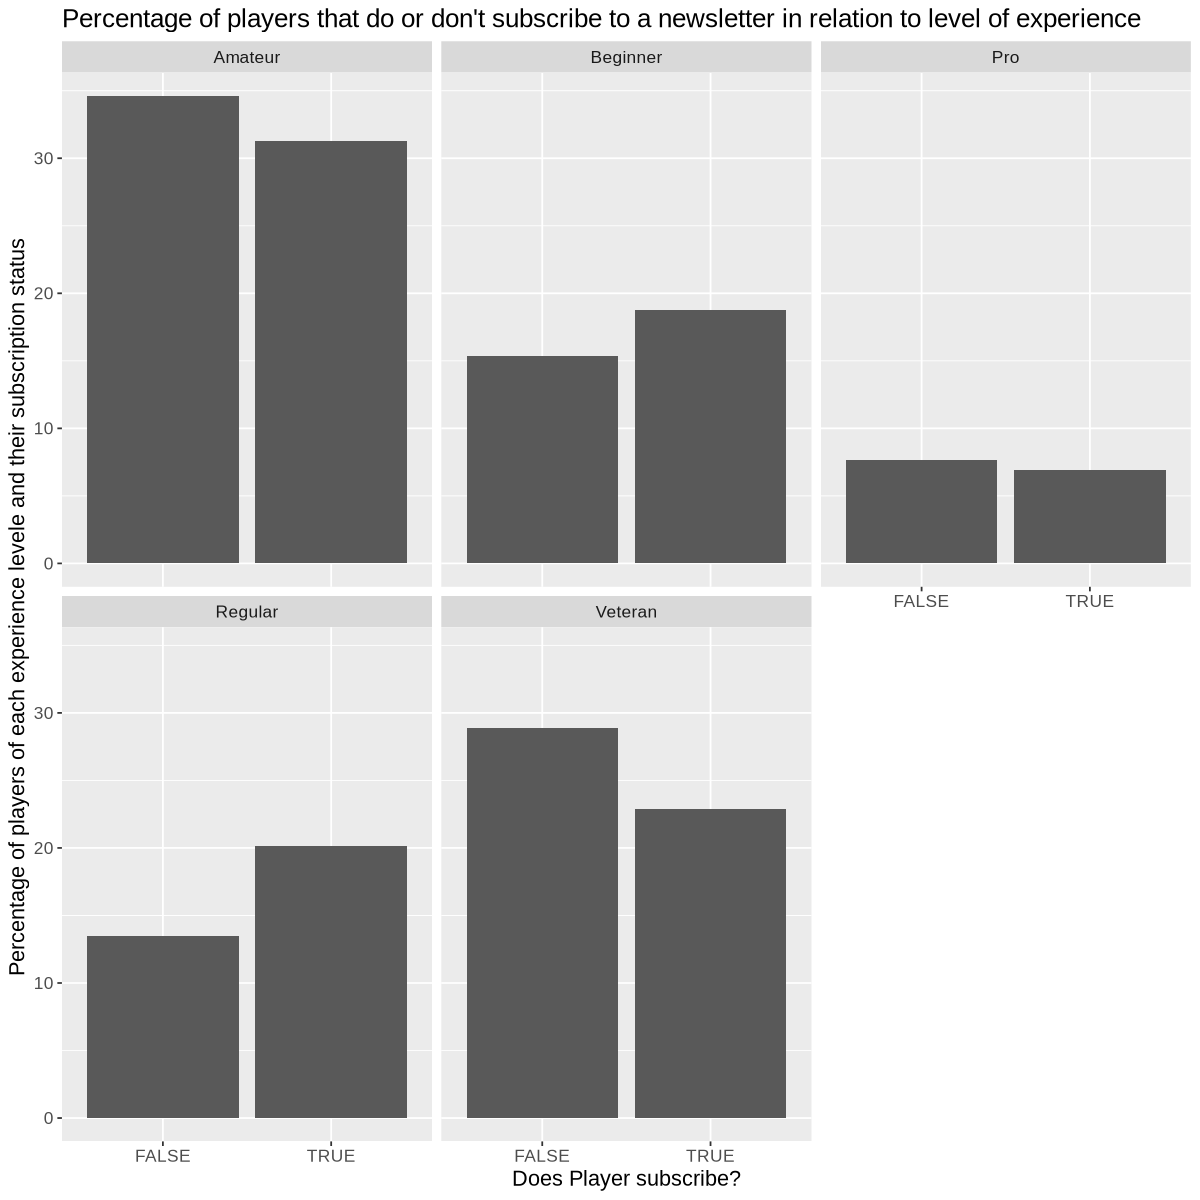

In [109]:
experience_subscribe_percent <- player_data |>
  group_by(subscribe, experience) |>
  summarize(count = n(), .groups = "drop") |>
  group_by(subscribe) |>
  mutate(total_subscribe_count = sum(count)) |>
  mutate(percentage = (count / total_subscribe_count) * 100) |>
  ungroup()
    


experience_subscribe_plot<-experience_subscribe_percent|>
    ggplot(aes(x=subscribe,y=percentage))+
    geom_bar(stat="identity")+
    facet_wrap(facets=vars(experience))+
    labs(x="Does Player subscribe?", y="Percentage of players of each experience levele and their subscription status",
         title="Percentage of players that do or don't subscribe to a newsletter in relation to level of experience")+
    theme(text=element_text(size=13))
experience_subscribe_plot

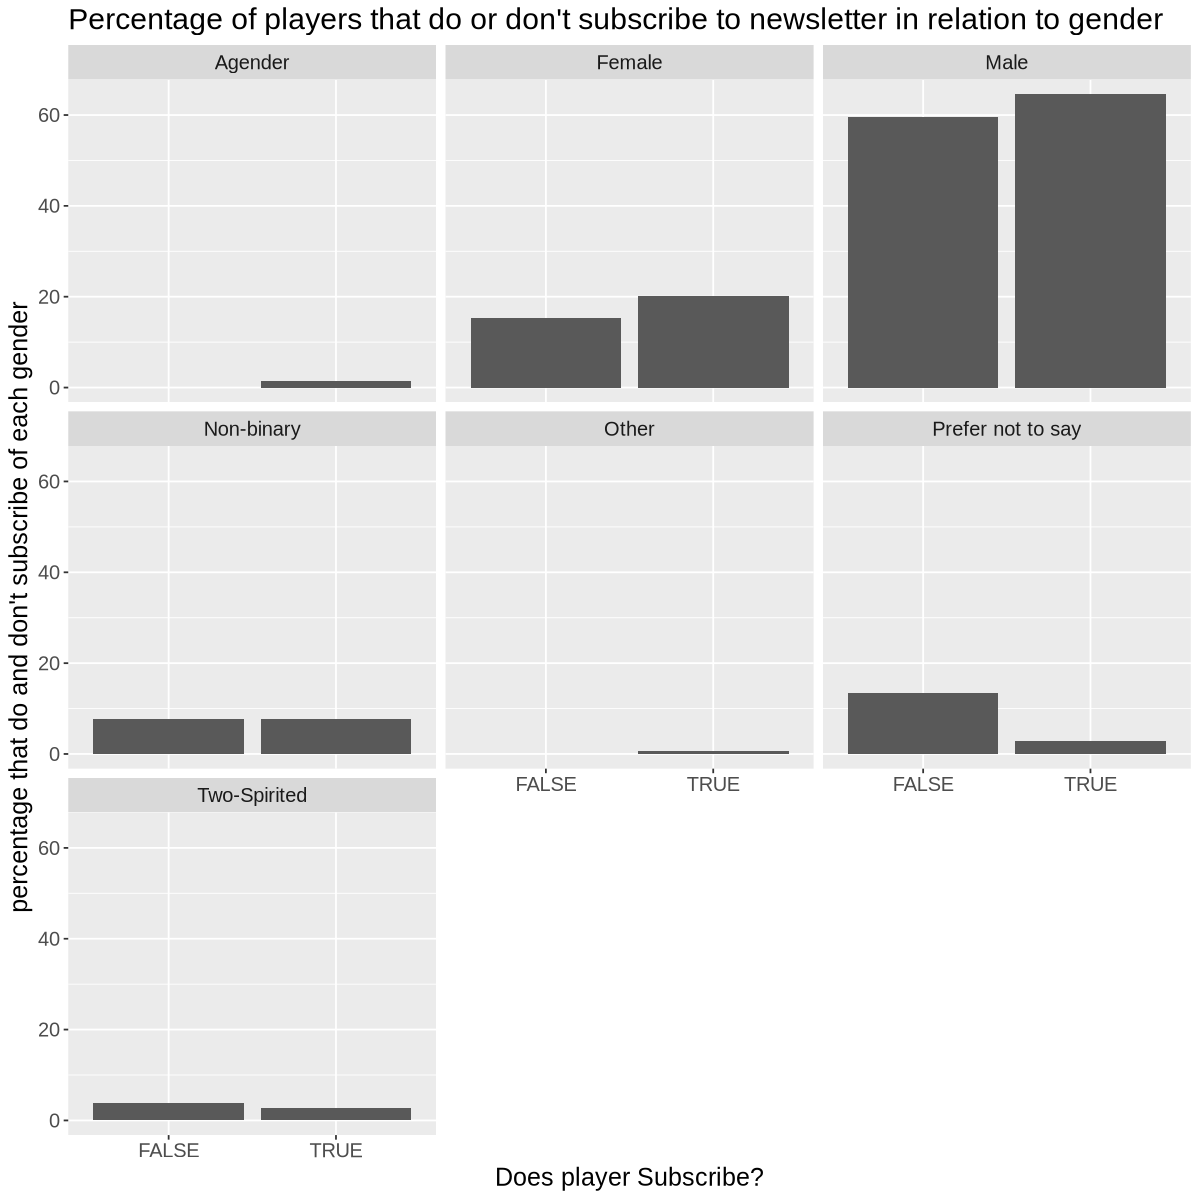

In [110]:
gender_subscribe_percent <- player_data |>
  group_by(subscribe, gender) |>
  summarize(count = n(), .groups = "drop") |>
  group_by(subscribe) |>
  mutate(total_subscribe_count = sum(count)) |>
  mutate(percentage = (count / total_subscribe_count) * 100) |>
  ungroup()

options(repr.plot.height=10, repr.plot.width=10)

gender_subscribe_plot<-gender_subscribe_percent|>
    ggplot(aes(x=subscribe,y=percentage))+
    geom_bar(stat="identity")+
    facet_wrap(facets=vars(gender))+
    labs(x="Does player Subscribe?", y="percentage that do and don't subscribe of each gender", 
           title="Percentage of players that do or don't subscribe to newsletter in relation to gender")+
    theme(text=element_text(size=15))
gender_subscribe_plot

In [111]:
player_data<-player_data|>mutate(subscribe=as.character(subscribe))

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


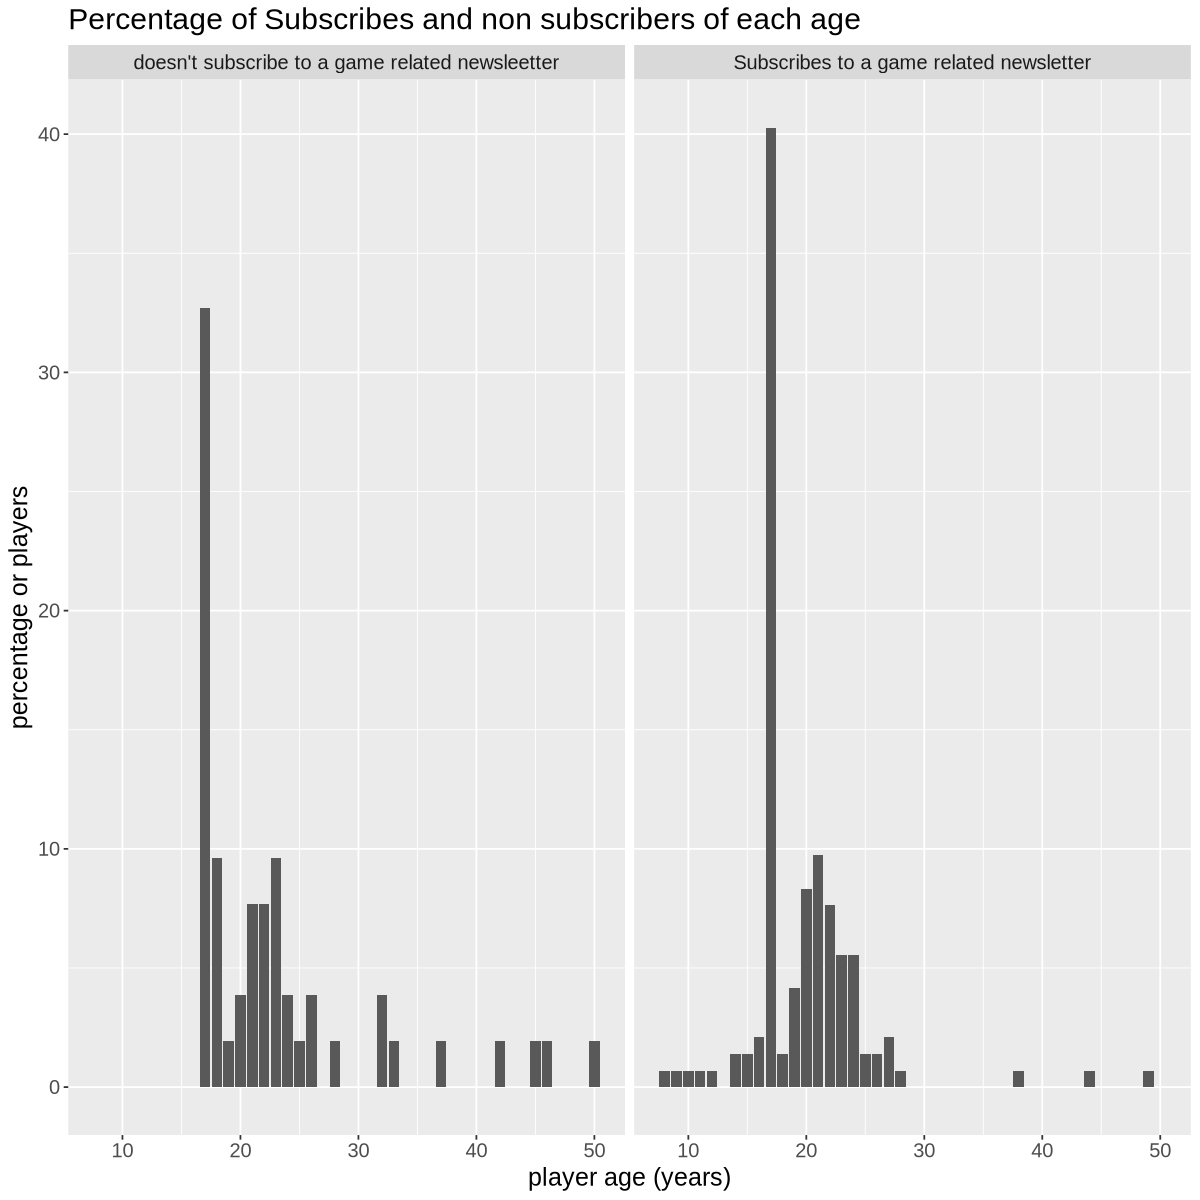

In [112]:
age_subscribe_percent <- player_data |>
  group_by(subscribe, Age) |>
  summarize(count = n(), .groups = "drop") |>
  group_by(subscribe) |>
  mutate(total_subscribe_count = sum(count)) |>
  mutate(percentage = (count / total_subscribe_count) * 100) |>
  ungroup()

options(repr.plot.height=10, repr.plot.width=10)

age_subscribe_plot<-age_subscribe_percent|> ggplot(aes(x=Age,y=percentage))+
    geom_bar(stat="identity")+
    facet_wrap(facets=vars(subscribe), labeller=labeller(subscribe=
                    c("TRUE"="Subscribes to a game related newsletter", "FALSE"="doesn't subscribe to a game related newsleetter")))+
    labs(x="player age (years)", y="percentage or players", title="Percentage of Subscribes and non subscribers of each age")+
    theme(text=element_text(size=15))

age_subscribe_plot

The graphs indicate that the percent of subscribers and non-subscribers is very similar across many characteristics. This makes it seem unlikely that any of these predictors alone could be used to determin if a player subscribes to a newsletter or not. With that being said it may be that combining these predictors can be used to make accurate predictions. 

### Methods and Plan

To address the question I mentioned previously I will create multiple knn-classification models to determine which combination of predictors is most accurate in determining whether a player subscribe to a newsletter. However, based on preliminary exploration in may be that there will be no good predictors of subscription status as characteristics have been very similar fro both subscribers and non-subscribers. The models will be compared by taking metrics of there performance, specifically accuracy. The data will be split into a testing and training set before the models are created. The split will be about 80% training to 20% testing, to account for the low number of observations. Each model will be tuned to the best k-value using cross validation. 